In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_path = r"C:\Users\shiva\Downloads\waste classification\datasets\TRAIN"
test_path = r"C:\Users\shiva\Downloads\waste classification\datasets\TEST"

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [6]:
#visualization
x_data = []
y_data = []
for category in glob(train_path+"/*"):
    for file in tqdm(glob(category+"/*")):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,"label":y_data})
 
data.shape

100%|██████████| 9999/9999 [00:13<00:00, 730.18it/s]
0it [00:00, ?it/s]


(22564, 2)

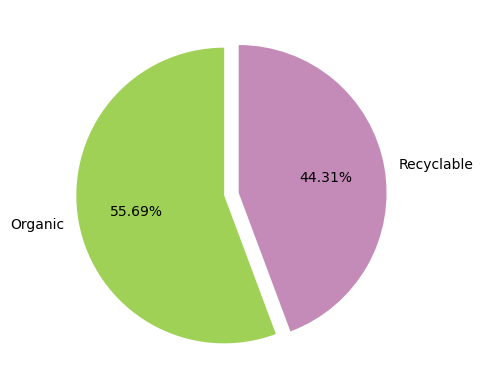

In [7]:
colors = ["#a0d157", "#c48bb8"]
plt.pie(data.label.value_counts(), labels = ["Organic","Recyclable"], autopct = '%0.2f%%', colors = colors, startangle = 90, explode = [0.05, 0.05] ) #explode is optional
plt.show()

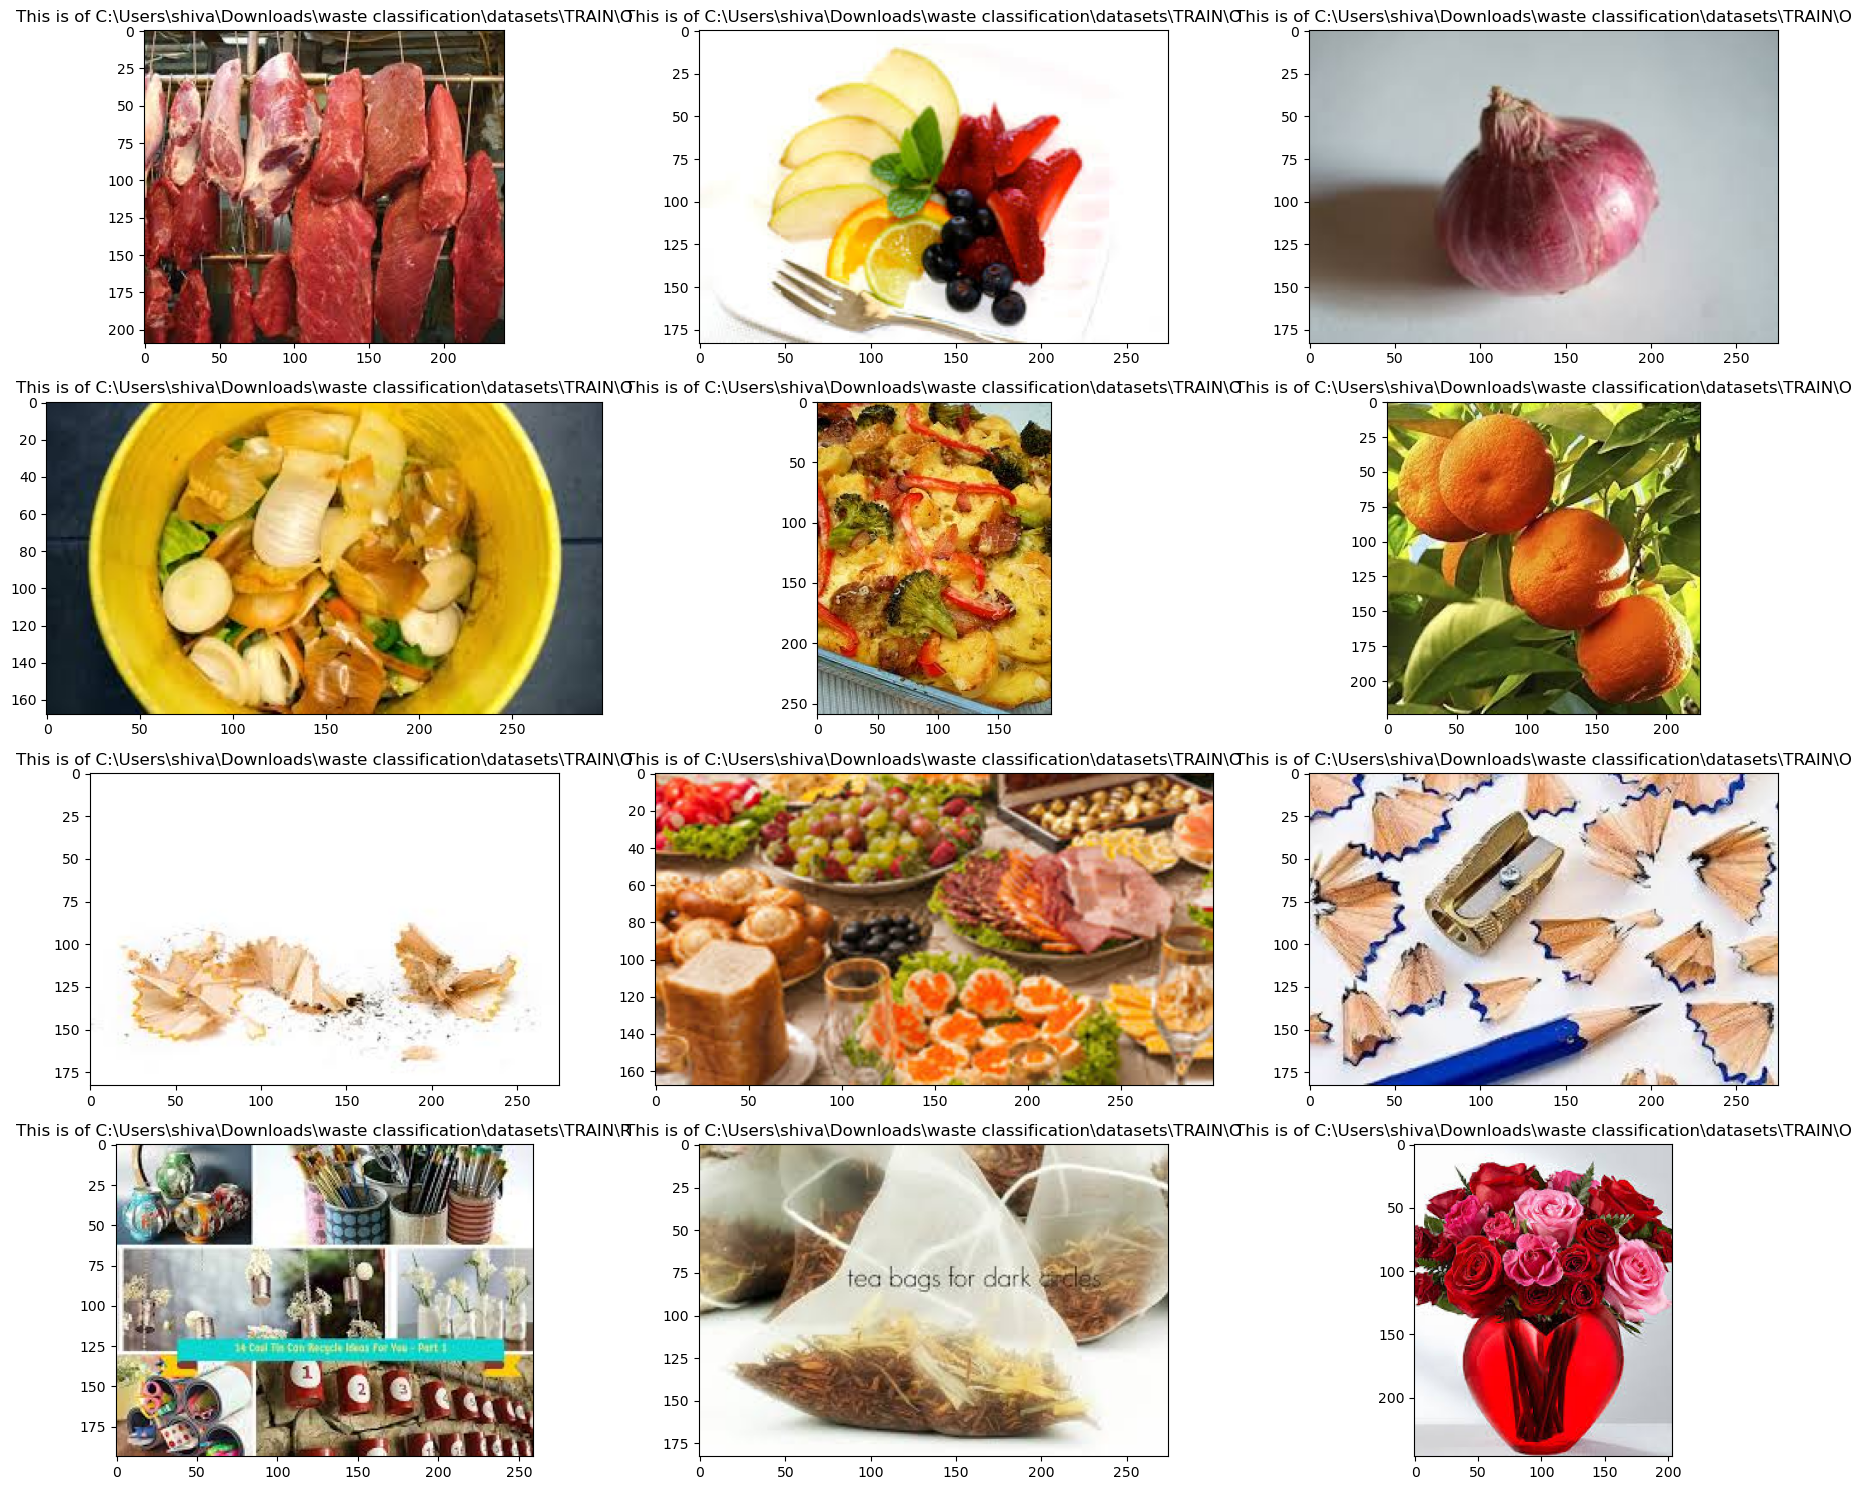

In [8]:
plt.figure(figsize=(20, 15))
for i in range(12):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256

model.summary()

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size = (224, 224),
    batch_size = batch_size, 
    color_mode = "rgb", 
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [14]:
hist = model.fit(
    train_generator, 
    epochs=10, 
    validation_data=test_generator 
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 752s 8s/step - accuracy: 0.7333 - loss: 0.5780 - val_accuracy: 0.8341 - val_loss: 0.3736
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 743s 8s/step - accuracy: 0.8330 - loss: 0.4108 - val_accuracy: 0.8802 - val_loss: 0.3183
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 727s 8s/step - accuracy: 0.8496 - loss: 0.3684 - val_accuracy: 0.8890 - val_loss: 0.2739
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1112s 13s/step - accuracy: 0.8623 - loss: 0.3359 - val_accuracy: 0.9005 - val_loss: 0.2661
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 36639s 416s/step - accuracy: 0.8787 - loss: 0.3112 - val_accuracy: 0.8942 - val_loss: 0.2731
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2448s 28s/step - accuracy: 0.8913 - loss: 0.2806 - val_accuracy: 0.8770 - val_loss: 0.2914
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2328s 26s/step - accuracy: 0.8985 - loss: 0.2542 - val_accuracy: 0.9160 - val_loss: 0.2343
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2289s 25s/step - accuracy: 0.9138 - loss: 0.2208 - val_accuracy

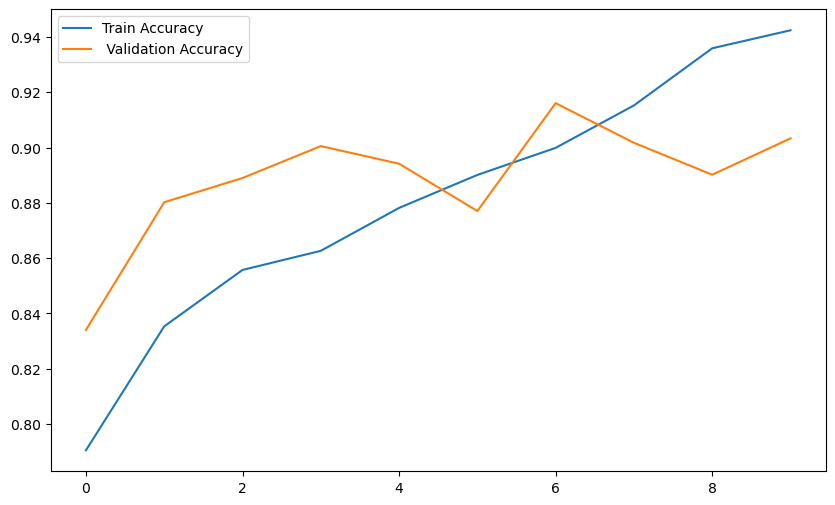

In [15]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label=' Validation Accuracy')
plt.legend()
plt.show()
     

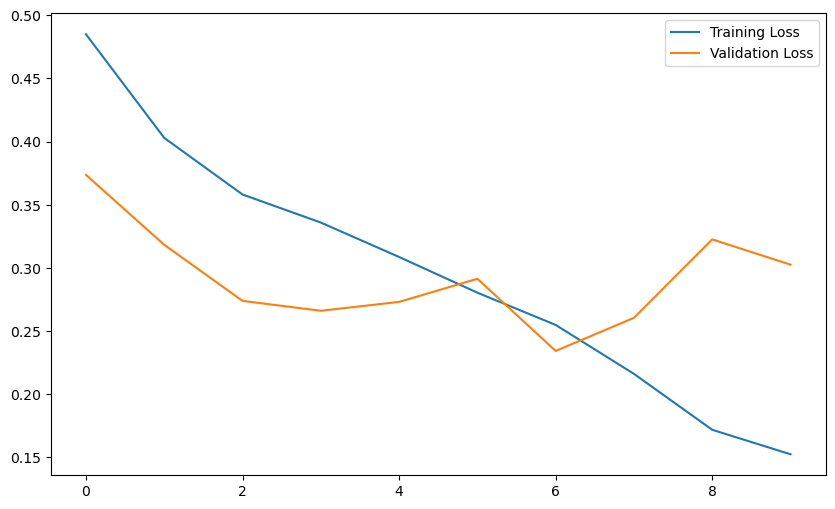

In [16]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [17]:
def predict_fun(img):
  plt.figure(figsize=(6, 4))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img = cv2.resize(img, (224, 224))
  img = np.reshape(img, [-1, 224, 224, 3])
  result = np.argmax(model.predict(img))
  if result == 0:
    print('The image shown is Recyclable Waste')
  elif result == 1:
    print('The image shown is Organic Waste')
     

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
The image shown is Organic Waste


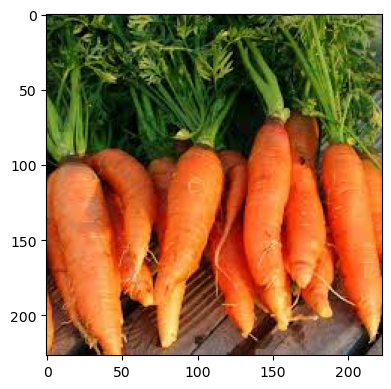

In [21]:
test_img = cv2.imread(r"C:\Users\shiva\OneDrive\Desktop\waste classification\datasets\TEST\O\O_12568.jpg")

predict_fun(test_img)
     

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
The image shown is Organic Waste


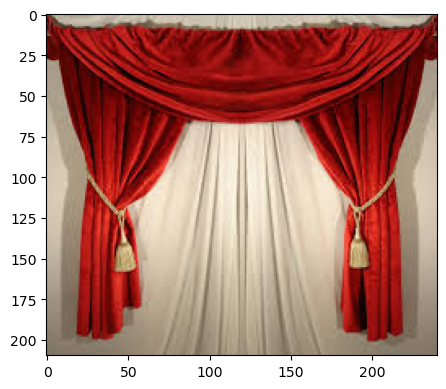

In [27]:
test_img = cv2.imread(r"C:\Users\shiva\OneDrive\Desktop\waste classification\datasets\TEST\R\R_10000.jpg")
predict_fun(test_img)
     